## Multi-Layer Perceptron

We have modeled perceptron learning, while perceptron can not solve the non-separable problems, one of the methods is feature mapping, the other is the multi-layer perceptron(i.e. full-connection neural network). MLP adds hidden neurons to the model.

Moreover, in perceptron learning algorithm, the function $\text{sign}(\cdot)$ is hard to optimize. Here we need a differentiable objective which can be solved in gradient-based method. The most popular **activation function** of the "**soma**" is Sigmoid function

$$\sigma(x)=\frac{1}{1+e^{-x}}$$

The nice property of $\sigma(\cdot)$ is

$$\frac{\partial\sigma(x)}{\partial x}=\sigma(x)(1-\sigma(x))$$

<div style = "text-align:center">
<img src="Pictures\MLP.png", title = "Multi-Layer Perceptron", width = "400", height = "300"/>
<caption><B>FIGURE 1: The Architecture of Multi-Layer Perceptron</B></caption>
</div>

Consider $n_l$ layers network, assume the number of nodes in $l$-th layer is $s_l$.

Define the Loss function

$$J(W,b)=\big[\frac{1}{m}\sum_{i=1}^mJ(W,b;x^{(i)},y^{(i)})\big]+\frac{\lambda}{2}\sum_{l=1}^{n_l}\sum_i^{s_l}\sum_j^{s_{l+1}}(W_{ij}^{(l)})^2$$

Here we adapt the error measure $MSE$,

$$J(W,b)=\Big[\frac{1}{m}\sum_{i=1}^m\Big(\frac{1}{2}\big\|h_{W,b}(x^{(i)})-y^{(i)}\big\|^2\Big)\Big]+\frac{\lambda}{2}\sum_{l=1}^{n_l}\sum_i^{s_l}\sum_j^{s_{l+1}}(W_{ij}^{(l)})^2$$

Recall the gradient descent method, the update rule:

$$W_{ij}^{(l)}=W_{ij}^{(l)}-\alpha\frac{\partial J(W,b)}{\partial W_{ij}^{(l)}}$$

$$b_i^{(l)}=b_i^{(l)}-\alpha\frac{\partial J(W,b)}{\partial b_i^{(l)}}$$

where $\alpha$ is the learning rate.

Then we compute the gradient

$$\frac{\partial J(W,b)}{\partial W_{ij}}=\Big[\frac{1}{m}\sum_{i=1}^m\frac{\partial J(W,b;x^{(i)},y^{(i)})}{\partial W_{ij}}\Big]+\lambda W_{ij}^{(l)}$$

$$\frac{\partial J(W,b)}{\partial b_i^{(l)}}=\frac{1}{m}\sum_{i=1}^m\frac{\partial J(W,b;x^{(i)},y^{(i)})}{\partial b_i^{(l)}}$$

For each layer, we need **back-propagation** algorithm. The heuristic is for each sample $(x,y)$, we use forward-propagation to compute the inner product at layer $l$ and node $j$, called $z_j^{(l)}$ , and the output of layer $l$ and node $j$ - $a_j^{(l)}$ until output layer. Then compute the "residual" at $l$-th layer and $i$-th node $\delta_i^{(l)}$ until the input layer.


For the output layer $n_l$, the residual is

\begin{align*}
\delta_i^{(n_l)} &= \frac{\partial}{\partial z_i^{(n_l)}}J(W,b;x,y)\\
&= \frac{\partial}{\partial z_i^{(n_l)}}\frac{1}{2}\big\|y-h_{W,b}(x)\big\|^2\\
&=\frac{\partial}{\partial z_i^{(n_l)}}\frac{1}{2}\sum_{j=1}^{S_{n_l}}(y_j-a_j^{(n_l)})^2\\
&=\frac{\partial}{\partial z_i^{(n_l)}}\frac{1}{2}\sum_{j=1}^{S_{n_l}}(y_j-\sigma(z_j^{(n_l)})^2\\
&=-(y_i-\sigma(z_i^{(n_l)}))\cdot\sigma'(z_i^{(n_l)})\\
&=-(y_i-a_i^{(n_l)})\cdot\sigma'(z_i^{(n_l)})\\
\end{align*}

For the layer $l=n_l-1,n_l-2,\dots,2$, the residual of $i$-th node at $l$-th layer can be shown as

\begin{align*}
\delta_i^{(l)}&=\frac{\partial}{\partial z_i^{(l)}}J(W,b;x,y)\\
&=\frac{\partial}{\partial z_i^{(l)}}\frac{1}{2}\big\|y-h_{W,b}(x)\big\|^2\\
&=\frac{\partial}{\partial z_i^{(l)}}\frac{1}{2}\sum_{j=1}^{S_{l+1}}(y_j-a_j^{(n_{l+1})})^2\\
&=\frac{1}{2}\sum_{j=1}^{S_{l+1}}\frac{\partial}{\partial z_i^{(l)}}\big(y_j-\sigma(z_j^{(l+1)})\big)^2\\
&=\sum_{j=1}^{S_{l+1}}-\big(y_i-\sigma(z_j^{(l+1)})\big)\cdot\frac{\partial}{\partial z_i^{(l)}}\sigma(z_j^{(l+1)})\\
&=\sum_{j=1}^{S_{l+1}}-\big(y_i-\sigma(z_j^{(l+1)})\big)\cdot\sigma'(z_j^{(l+1)})\cdot\frac{\partial z_i^{(l+1)}}{\partial z_i^{(l)}}\\
&=\sum_{j=1}^{S_{l+1}}\delta_j^{(l+1)}\cdot\frac{\partial z_i^{(l+1)}}{\partial z_i^{(l)}}\\
&=\sum_{j=1}^{S_{l+1}}\Big(\delta_j^{(l+1)}\cdot\frac{\partial }{\partial z_i^{(l)}}\sum_{k=1}^{S_l}\sigma(z_k^{(l)})\cdot W_{jk}^{(l)}\Big)\\
&=\sum_{j=1}^{S_{l+1}}\delta_j^{(l+1)}\cdot W_{ji}^{(l)}\cdot \sigma(z_i^{(l)})\\
&=\Big(\sum_{j=1}^{S_{l+1}}W_{ji}^{(l)}\delta_j^{(l+1)}\Big)\sigma(z_i^{(l)})
\end{align*}

Therefore,

$$\frac{\partial J(W,b;x,y)}{\partial W_{ij}^{(l)}}=\frac{\partial J(W,b;x,y)}{\partial z_i^{(l+1)}}\frac{\partial z_i^{(l+1)}}{\partial W_{ij}^{(l)}}=\delta_i^{(l+1)}a_j^{(l)}$$

$$\frac{\partial J(W,b;x,y)}{\partial b_{i}^{(l)}}=\frac{\partial J(W,b;x,y)}{\partial z_i^{(l+1)}}\frac{\partial z_i^{(l+1)}}{\partial b_{i}^{(l)}}=\delta_i^{(l+1)}$$

The regularization term of layer $l$ can be get easily

$$R^{(l)}=\lambda W^{(l)}$$

Summary, an epoch of computation can be shown as follows:

1.Conduct the forward-propagation algorithm, get the output $a^{(2)},a^{(3)},\dots,a^{(n_l)}$.

2.Compute the output layer error

$$\delta^{(n_l)}=-(y-a^{(n_l)})\odot\sigma'(z^{(n_l)})$$

3.Then the others, for $l=n_l-1,\dots,2$

$$\delta^{(l)}=(W^{(l)T}\delta^{(l+1)})\odot\sigma'(z^{(l)})$$

4.Compute the gradient of $(x^{(i)},y^{(i)})$

$$\nabla_{W^{(l)}}J(W,b;x^{(i)},y^{(i)})=\delta^{(l+1)}(a^{(l)})^T$$

$$\nabla_{b^{(l)}}J(W,b;x^{(i)},y^{(i)})=\delta^{(l+1)}$$

5.Update parameters

$$W^{(l)}=W^{(l)}-\alpha\Big[\big(\frac{1}{m}\sum_i\nabla_{W^{(l)}}J(W,b;x^{(i)},y^{(i)})\big)+\lambda W^{(l)}\Big]$$

$$b^{(l)}=b^{(l)}-\alpha\Big[\frac{1}{m}\sum_i\nabla_{b^{(l)}}J(W,b;x^{(i)},y^{(i)})\Big]$$

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
class Activation:
    def __init__(self, name):
        self.name = name
        assert self.name in ["sigmoid", "tanh", "relu", "softmax"], "Illegal activation function."
        
    def evaluation(self, Z):
        if self.name == "sigmoid":
            return 1.0 / (1 + np.exp(-Z))
        
        elif self.name == "tanh":
            return np.tanh(Z)
        
        elif self.name == "softmax":
            Z = Z - np.max(Z, axis = 0, keepdims = True)
            Z = np.exp(Z)
            Z = Z / np.sum(Z, axis = 0, keepdims = True) 
            return Z
        
        else:
            return np.maximum(0, Z)
        
    def derivative(self, A):
        
        if self.name == "sigmoid":
            return A * (1 - A)
        
        elif self.name == "tanh":
            return 1 - np.power(A, 2)
        
        elif self.name == "softmax":
            return A
        
        else:
            return (A > 0)

In [3]:
class Loss:
    def __init__(self, name):
        self.name = name
        assert self.name in ["logistic", "multiclass_logistic"], "Illegal loss function"
    
    def evaluation(self, A, Y):
        if self.name == "logistic":
            return -1.0 / Y.shape[-1] * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
        
        elif self.name == "multiclass_logistic":
            return -1.0 / Y.shape[-1] * np.sum(Y * np.log(A))
    
    def derivative(self, A, Y):
        if self.name == "logistic":
            return -(Y / A - (1 - Y) / (1 - A))
        elif self.name == "multiclass_logistic":
            #return - Y / A
            return Y - A

In [4]:
class Regularizer:
    def __init__(self, name):
        self.name = name
        assert self.name in ["Frobenius"], "Illegal loss function"
    def evaluation(self, weights, num_layers, num_samples, regularization_coefficient):
        summation = 0.0
        for l in range(1, num_layers + 1):
            summation += np.linalg.norm(weights["Theta" + str(l)], ord = "fro") ** 2
        return 1.0 * regularization_coefficient / (2 * num_samples) * summation
    
    def derivative(self, weights, layer, num_samples, regularization_coefficient):
        return regularization_coefficient * weights["Theta" + str(layer)] / num_samples

In [5]:
class NeuralNetwork:
    
    def __init__(self, num_layers, hidden_units, activations, loss = "logistic", dropout = [], keep_prob = 0.5, 
                 initialization = "He", std = 0.01, bias = 0, regularizer = "Frobenius", regularization_coefficient = 0.0):
        
        self.num_layers = num_layers
        self.hidden_units = hidden_units
        self.activations = {}
        self.loss_function = Loss(name = loss)
        self.regularizer = Regularizer(name = regularizer)
        self.regularization_coefficient = regularization_coefficient
        self.loss_collection = []
        self.dropout = dropout
        self.keep_prob = keep_prob
        self.initialization = initialization
        self.std = std
        self.bias = bias
        
        assert self.std > 0, "The standard deviation of weights should be positive"
        assert self.num_layers == len(self.hidden_units), "The dimension of hidden units should be the same with num_layers."
        assert self.num_layers == len(activations), '''The dimension of activation functions should be 
                                                                the same with num_layers.'''
        for l in range(1, self.num_layers + 1):
            self.activations["activation" + str(l)] = Activation(activations[l - 1])
            
        
    def training(self, X, y, learning_rate = 0.01, mini_batch_size = 64, num_epochs = 1000, random_seed = 0, optimizer = "Adam", 
                 decay_for_avg_grad = 0.9, decay_for_squared_grad = 0.999, epsilon = 1e-8, decay_rate = 0.0):
        
        
        self.hidden_units.insert(0, X.shape[-1])
        self.learning_rate = learning_rate
        self.parameters = {}
        self.initialize(initialization = self.initialization, std = self.std, bias = self.bias, random_seed = random_seed)
        self.optimizer = optimizer
        self.caches = {}        
        
        mini_batches = self.mini_batch_split(X, y, mini_batch_size = mini_batch_size, random_seed = random_seed)
        
        for epoch in range(1, num_epochs + 1):
            num_observations = None
            for minibatch in mini_batches:
                X, y = minibatch
                num_observations = X.shape[-1]
                self.forward_propagation(X, y)
                self.backward_propagation(X, y)
                self.optimize(optimizer = self.optimizer, learning_rate = self.learning_rate, epoch = epoch, 
                              decay_for_avg_grad = decay_for_avg_grad, decay_for_squared_grad = decay_for_squared_grad,
                              epsilon = epsilon)
            loss = self.loss_function.evaluation(self.caches["A" + str(self.num_layers)], y) \
                   + self.regularizer.evaluation(self.parameters, self.num_layers, num_observations, 
                   self.regularization_coefficient)
            self.loss_collection.append(loss)
            self.learning_rate *= 1.0 / (1 + decay_rate * epoch)
            
    def initialize(self, initialization, std, bias, random_seed):
        np.random.seed(random_seed)
        if initialization == "He":
            for l in range(1, self.num_layers + 1):
                self.parameters["Theta" + str(l)] = np.random.randn(self.hidden_units[l], self.hidden_units[l - 1]) \
                                                    * np.sqrt(2. / self.hidden_units[l - 1])
                self.parameters["theta" + str(l)] = np.zeros((self.hidden_units[l], 1)) + bias
        elif initialization == "Random":
            for l in range(1, self.num_layers + 1):
                self.parameters["Theta" + str(l)] = np.random.randn(self.hidden_units[l], self.hidden_units[l - 1]) * std
                self.parameters["theta" + str(l)] = np.zeros((self.hidden_units[l], 1)) + bias
        else:
            raise "NameError", "Undefined Initialization"
    
    def mini_batch_split(self, X, y, mini_batch_size, random_seed):
        np.random.seed(random_seed)
        mini_batches = []
        X = X.T
        num_observations = X.shape[-1]
        order = list(np.random.permutation(num_observations))
        X_shuffled = X[:, order]
        y_shuffled = y[order].reshape((1, num_observations))
        num_full_minibatches = int(np.floor(num_observations * 1.0 / mini_batch_size))
        for minibatch in range(num_full_minibatches):
            mini_batches.append((X_shuffled[:, minibatch * mini_batch_size: (minibatch + 1) * mini_batch_size],
                                 y_shuffled[:, minibatch * mini_batch_size: (minibatch + 1) * mini_batch_size]))
        if num_observations % mini_batch_size != 0:
            mini_batches.append((X_shuffled[:, num_full_minibatches * mini_batch_size:],
                                 y_shuffled[:, num_full_minibatches * mini_batch_size:]))
        return mini_batches

    def forward_propagation(self, X, y):
        self.caches["A" + str(0)] = X
        for l in range(1, self.num_layers + 1):
            self.caches["Z" + str(l)] = np.dot(self.parameters["Theta" + str(l)], self.caches["A" + str(l - 1)]) \
                                        + self.parameters["theta" + str(l)]
            
            self.caches["A" + str(l)] = self.activations["activation" + str(l)].evaluation(self.caches["Z" + str(l)])
            
            if l in self.dropout:
                self.caches["D" + str(l)] = (np.random.rand(self.caches["A" + str(l)].shape[0], 
                                                            self.caches["A" + str(l)].shape[1])) < self.keep_prob
                self.caches["A" + str(l)] *=  (self.caches["D" + str(l)] / self.keep_prob)
        
    
    
    def backward_propagation(self, X, y):
        num_observations = X.shape[-1]
        self.caches["dA" + str(self.num_layers)] = self.loss_function.derivative(self.caches["A" + str(self.num_layers)], y)
        for l in range(self.num_layers, 0, -1):
            self.caches["dZ" + str(l)] = self.caches["dA" + str(l)] * self.activations["activation" + str(l)].derivative(self.caches["A" + str(l)])
            self.caches["dTheta" + str(l)] = 1.0 / num_observations * np.dot(self.caches["dZ" + str(l)], self.caches["A" + str(l - 1)].T) + self.regularizer.derivative(self.parameters, l, num_observations, 
                                                                         self.regularization_coefficient)
            
            self.caches["dtheta" + str(l)] = 1.0 / num_observations * np.sum(self.caches["dZ" + str(l)], axis = 1, keepdims = True)
            
            self.caches["dA" + str(l - 1)] = np.dot(self.parameters["Theta" + str(l)].T, self.caches["dZ" + str(l)])
            
            
            if l - 1 in self.dropout:
                self.caches["dA" + str(l - 1)] *= (self.caches["D" + str(l - 1)] / self.keep_prob)
    
    
    
    def optimize(self, optimizer, learning_rate, epoch, decay_for_avg_grad, decay_for_squared_grad, epsilon):
        
        if optimizer == "GD":
            for l in range(1, self.num_layers + 1):
                self.parameters["Theta" + str(l)] -= learning_rate * self.caches["dTheta" + str(l)]
                self.parameters["theta" + str(l)] -= learning_rate * self.caches["dtheta" + str(l)]
                
        elif optimizer == "Adam":
            avg_grad = {}
            squared_grad = {}
            for l in range(1, self.num_layers + 1):
                avg_grad['dTheta' + str(l)] = np.zeros_like(self.parameters['Theta' + str(l)])
                avg_grad['dtheta' + str(l)] = np.zeros_like(self.parameters['theta' + str(l)])
                squared_grad['dTheta' + str(l)] = np.zeros_like(self.parameters['Theta' + str(l)])
                squared_grad['dtheta' + str(l)] = np.zeros_like(self.parameters['theta' + str(l)])
            for l in range(1, self.num_layers + 1):
                avg_grad['dTheta' + str(l)] = decay_for_avg_grad * avg_grad['dTheta' + str(l)] + (1 - decay_for_avg_grad) * self.caches["dTheta" + str(l)]
                
                avg_grad['dtheta' + str(l)] = decay_for_avg_grad * avg_grad['dtheta' + str(l)] + (1 - decay_for_avg_grad) * self.caches["dtheta" + str(l)]
                
                squared_grad['dTheta' + str(l)] = decay_for_squared_grad * squared_grad['dTheta' + str(l)] + (1 - decay_for_squared_grad) * self.caches["dTheta" + str(l)] ** 2
                
                squared_grad['dtheta' + str(l)] = decay_for_squared_grad * squared_grad['dtheta' + str(l)] + (1 - decay_for_squared_grad) * self.caches["dtheta" + str(l)] ** 2
                avg_grad['dTheta' + str(l)] /= (1 - decay_for_avg_grad ** epoch)
                avg_grad['dtheta' + str(l)] /= (1 - decay_for_avg_grad ** epoch)
                
                squared_grad['dTheta' + str(l)] /= (1 - decay_for_squared_grad ** epoch)
                squared_grad['dtheta' + str(l)] /= (1 - decay_for_squared_grad ** epoch)
                
                self.parameters["Theta" + str(l)] -= learning_rate * avg_grad['dTheta' + str(l)] / \
                                                    (np.sqrt(squared_grad['dTheta' + str(l)]) + epsilon)
                
                self.parameters["theta" + str(l)] -= learning_rate * avg_grad['dtheta' + str(l)] / \
                                                    (np.sqrt(squared_grad['dtheta' + str(l)]) + epsilon)
                
            
    def predicting(self, X):
        self.caches["A" + str(0)] = X.T
        for l in range(1, self.num_layers + 1):
            self.caches["Z" + str(l)] = np.dot(self.parameters["Theta" + str(l)], self.caches["A" + str(l - 1)]) \
                                        + self.parameters["theta" + str(l)]
            self.caches["A" + str(l)] = self.activations["activation" + str(l)].evaluation(self.caches["Z" + str(l)])
        return (self.caches["A" + str(self.num_layers)] > 0.5)
        
    def plot_loss(self):
        plt.plot(self.loss_collection)
    


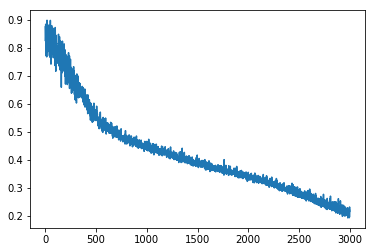

In [6]:
X = datasets.load_breast_cancer().data
X = (X - X.mean(axis = 0)) / X.std(axis = 0)
y = datasets.load_breast_cancer().target
num_obs = len(X)
training_percentage = 0.8
num_training = int(num_obs * training_percentage)
X_train, y_train, X_test, y_test = X[:num_training], y[:num_training], X[num_training: ], y[num_training: ] 
nn = NeuralNetwork(3, [7, 5, 1], ["relu", "relu", "sigmoid"], dropout = [1,2], keep_prob = 0.9, loss="logistic")
nn.training(X_train, y_train, learning_rate = 10e-6, epsilon=  10e-8, optimizer="Adam", mini_batch_size=128, 
            random_seed=22, num_epochs=3000, decay_rate = 0.0)
nn.plot_loss()

In [7]:
(nn.predicting(X_train) == y_train).sum() * 1.0 / len(y_train)

0.9824175824175824

In [8]:
(nn.predicting(X_test) == y_test).sum() * 1.0 / len(y_test)

0.9912280701754386

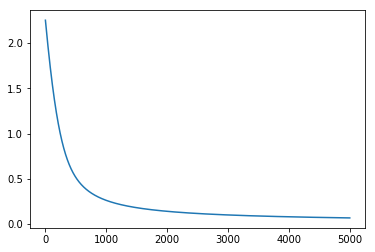

In [9]:
nn = NeuralNetwork(1, [1], ["sigmoid"])
nn.training(X_train, y_train, learning_rate = 10e-5, num_epochs = 5000, optimizer = "GD")
nn.plot_loss()

In [10]:
(nn.predicting(X_train) == y_train).sum() * 1.0 / len(y_train)

0.945054945054945

In [11]:
(nn.predicting(X_test) == y_test).sum() * 1.0 / len(y_test)

0.956140350877193